1.**Read** the CSV file.`(retail_sales_data_1000.csv)`

In [161]:
import pandas as pd
import numpy as np

In [162]:
df = pd.read_csv('/content/retail_sales_data_1000.csv')
df

,Date,ProductID,ProductName,Category,Quantity,Price,TotalSales,StoreLocation
0,2023-06-22,5,ProductA,Clothing,5.0,NaN,315.87,NaN
1,2023-02-17,23,ProductD,Home & Kitchen,5.0,25.99,257.71,New York
2,2023-04-28,30,ProductD,Electronics,4.0,20.99,130.63,Chicago
3,2023-07-12,39,ProductD,Clothing,2.0,10.99,276.87,New York
4,2023-11-20,12,NaN,Sports,2.0,30.99,51.66,Los Angeles
...,...,...,...,...,...,...,...,...
1015,2023-03-30,10,ProductC,Sports,1.0,10.99,89.24,Los Angeles
1016,2023-11-11,12,ProductA,Sports,5.0,25.99,115.43,NaN
1017,2023-07-13,17,ProductB,Electronics,3.0,NaN,58.04,Houston
1018,2023-02-09,40,ProductC,Clothing,5.0,10.99,244.48,Houston


2.Check for the **null values** in the **dataset**. If **null values** present in the dataset then fill those **null values** with **apropiate values**.

In [163]:
df.isnull().sum()

Date               0
ProductID          0
ProductName      201
Category         202
Quantity         165
Price            167
TotalSales         0
StoreLocation    200
dtype: int64

In [164]:
df['ProductName']=df['ProductName'].fillna(df['ProductName'].mode()[0])
df['Category']=df['Category'].fillna(df['Category'].mode()[0])
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mode()[0])
df['Price']=df['Price'].fillna(df['Price'].mode()[0])
df['StoreLocation']=df['StoreLocation'].fillna(df['StoreLocation'].mode()[0])
df.isnull().sum()

Date             0
ProductID        0
ProductName      0
Category         0
Quantity         0
Price            0
TotalSales       0
StoreLocation    0
dtype: int64

3.check for the **data types** of the columns in the **dataframe** and change them accordingly.

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1020 non-null   object 
 1   ProductID      1020 non-null   int64  
 2   ProductName    1020 non-null   object 
 3   Category       1020 non-null   object 
 4   Quantity       1020 non-null   float64
 5   Price          1020 non-null   float64
 6   TotalSales     1020 non-null   float64
 7   StoreLocation  1020 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.9+ KB


In [166]:
df['Date'] = pd.to_datetime(df['Date'])
df['ProductName'] = df['ProductName'].astype('string')
df['Category'] = df['Category'].astype('string')
df['StoreLocation'] = df['StoreLocation'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1020 non-null   datetime64[ns]
 1   ProductID      1020 non-null   int64         
 2   ProductName    1020 non-null   string        
 3   Category       1020 non-null   string        
 4   Quantity       1020 non-null   float64       
 5   Price          1020 non-null   float64       
 6   TotalSales     1020 non-null   float64       
 7   StoreLocation  1020 non-null   string        
dtypes: datetime64[ns](1), float64(3), int64(1), string(3)
memory usage: 63.9 KB


4.Are there any **duplicate rows** in the dataset, if **duplicate rows** present in the dataset then **drop** those **duplicate rows**.

In [167]:
df.duplicated().sum()

20

In [168]:
df = df.drop_duplicates(keep=False)
df.duplicated().sum()

0

5.Create a bar chart using **Seaborn** to display the **average TotalSales** by **Category**.

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
df

,Date,ProductID,ProductName,Category,Quantity,Price,TotalSales,StoreLocation
20,2023-06-24,19,ProductC,Clothing,1.0,10.99,63.46,Houston
21,2023-03-30,29,ProductD,Electronics,1.0,20.99,336.19,Los Angeles
22,2023-12-04,1,ProductC,Clothing,1.0,15.99,221.71,New York
23,2023-06-15,22,ProductC,Sports,1.0,15.99,438.26,New York
24,2023-01-26,25,ProductB,Home & Kitchen,4.0,10.99,194.39,Houston
...,...,...,...,...,...,...,...,...
995,2023-07-03,21,ProductB,Electronics & Gadgets,4.0,15.99,155.40,Houston
996,2023-04-24,28,ProductB,Electronics & Gadgets,2.0,25.99,351.67,Houston
997,2023-07-25,29,ProductC,Electronics & Gadgets,1.0,20.99,486.50,Chicago
998,2023-11-08,15,ProductB,Electronics & Gadgets,1.0,15.99,157.19,Chicago


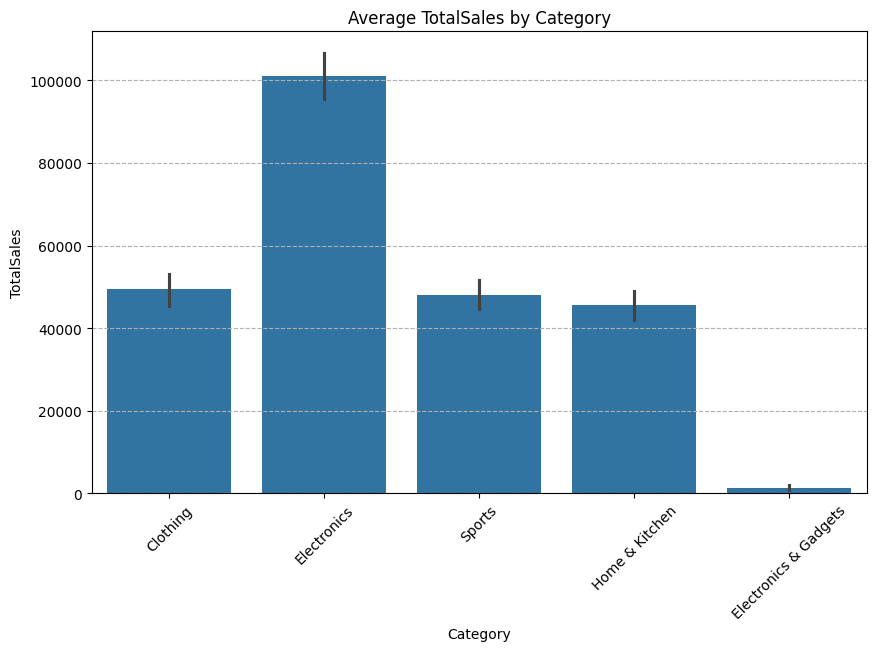

In [171]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='TotalSales',data=df, estimator=sum)
plt.title("Average TotalSales by Category")
plt.xlabel("Category")
plt.ylabel("TotalSales")
plt.grid(axis='y',linestyle='--')
plt.xticks(rotation=45)
plt.show()

6.Use **seaborn** to generate a **box plot** visualizing the **distribution** of **TotalSales for each StoreLocation**

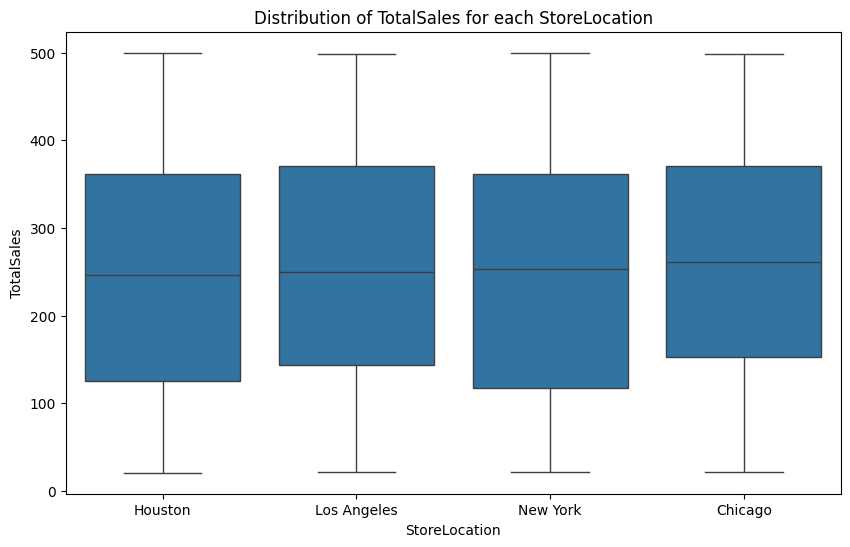

In [172]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreLocation', y='TotalSales', data=df)
plt.title('Distribution of TotalSales for each StoreLocation')
plt.xlabel('StoreLocation')
plt.ylabel('TotalSales')
plt.show()

7.Use **Matplotlib** to create a **pie chart** representing the proportion of **sales** by **Category**. Customize the chart with **labels** and a **legend**.

In [173]:
df

,Date,ProductID,ProductName,Category,Quantity,Price,TotalSales,StoreLocation
20,2023-06-24,19,ProductC,Clothing,1.0,10.99,63.46,Houston
21,2023-03-30,29,ProductD,Electronics,1.0,20.99,336.19,Los Angeles
22,2023-12-04,1,ProductC,Clothing,1.0,15.99,221.71,New York
23,2023-06-15,22,ProductC,Sports,1.0,15.99,438.26,New York
24,2023-01-26,25,ProductB,Home & Kitchen,4.0,10.99,194.39,Houston
...,...,...,...,...,...,...,...,...
995,2023-07-03,21,ProductB,Electronics & Gadgets,4.0,15.99,155.40,Houston
996,2023-04-24,28,ProductB,Electronics & Gadgets,2.0,25.99,351.67,Houston
997,2023-07-25,29,ProductC,Electronics & Gadgets,1.0,20.99,486.50,Chicago
998,2023-11-08,15,ProductB,Electronics & Gadgets,1.0,15.99,157.19,Chicago


In [174]:
proportion = df.groupby('Category')['TotalSales'].sum()
proportion

Category
Clothing                  49384.88
Electronics              100932.30
Electronics & Gadgets      1392.65
Home & Kitchen            45591.71
Sports                    48110.14
Name: TotalSales, dtype: float64

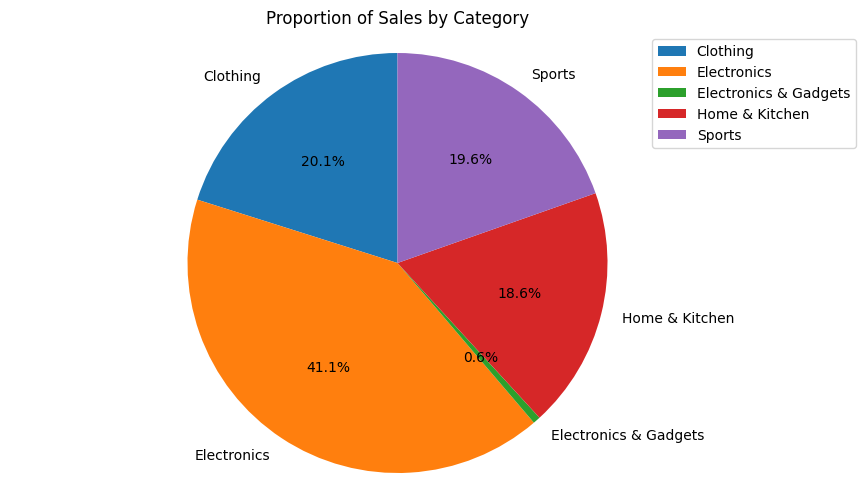

In [175]:
plt.figure(figsize=(10, 6))
plt.pie(proportion, labels=proportion.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sales by Category')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.axis('equal')
plt.show()

8.Using the **Folium library**, create a basic interactive **map** showing the location of one of the stores from the retail_sales_data_1000.csv dataset. Assume the store is located in "New York" and use the approximate coordinates for **New York City (latitude: 40.7128, longitude: -74.0060)**. Add a marker to the map for the New York store location and include a **popup** with the text **"New York Store"**.

In [176]:
import folium

In [182]:
latitude = 40.7128
longitude = -74.0060

map = folium.Map(location=[latitude,longitude], zoom_start=10)
folium.Marker(location=[latitude,longitude], popup='New York Store').add_to(map)

map

9.Use **Matplotlib** to plot a **histogram** of **TotalSales**. Customize the plot by adjusting bin size and adding labels and a title.

In [178]:
df

,Date,ProductID,ProductName,Category,Quantity,Price,TotalSales,StoreLocation
20,2023-06-24,19,ProductC,Clothing,1.0,10.99,63.46,Houston
21,2023-03-30,29,ProductD,Electronics,1.0,20.99,336.19,Los Angeles
22,2023-12-04,1,ProductC,Clothing,1.0,15.99,221.71,New York
23,2023-06-15,22,ProductC,Sports,1.0,15.99,438.26,New York
24,2023-01-26,25,ProductB,Home & Kitchen,4.0,10.99,194.39,Houston
...,...,...,...,...,...,...,...,...
995,2023-07-03,21,ProductB,Electronics & Gadgets,4.0,15.99,155.40,Houston
996,2023-04-24,28,ProductB,Electronics & Gadgets,2.0,25.99,351.67,Houston
997,2023-07-25,29,ProductC,Electronics & Gadgets,1.0,20.99,486.50,Chicago
998,2023-11-08,15,ProductB,Electronics & Gadgets,1.0,15.99,157.19,Chicago


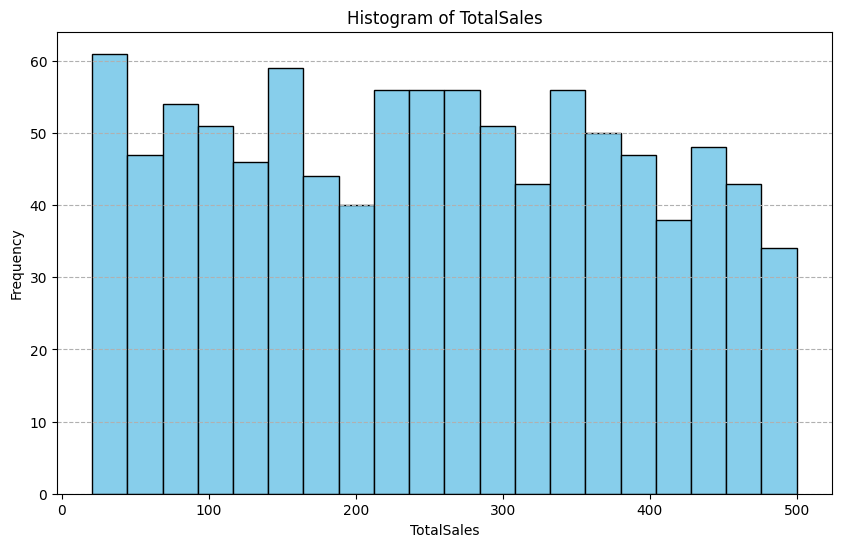

In [179]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalSales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of TotalSales')
plt.xlabel('TotalSales')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

10.Use **Plotly** to generate a **box plot** visualizing the **distribution** of **TotalSales** for each StoreLocation

In [180]:
import plotly.express as px

In [181]:
fig = px.box(df, x='StoreLocation', y='TotalSales', title='Distribution of TotalSales')
fig.show()